# (201902-fordgobike-tripdata)
## by (Michel Ashraf Malak)

## Preliminary Wrangling

> The dataset is from go ford bike and its in the period of 2019 feb.
The bikes are availble for the  members 24/7 and the member can either subscribe or just rent the bike as a customer

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [49]:
df=pd.read_csv('\201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> The data has 183412 rows with 16 feautres (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). 9 numeric 7 object strings. 

### What is/are the main feature(s) of interest in your dataset?

> trip duration,age of the members(which we will extract from the member_birth year,user_type,start_time)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>member_birth_year,start_time ,duration_sec                              

# Cleaning and wrangling the data set

In [50]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [51]:
#first we need to get the member age as its gonna be very useful for us in our analysis
#we will use the pythons data time library to get the current year
from datetime import datetime
todays_date = datetime.today()
todays_date.year
df['member_age']=todays_date.year-df['member_birth_year']


In [52]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0


In [53]:
df.member_age.isnull().sum()

8265

our data set has the trip duration in secs we will covert it to mins as it makes the investagion much easier

In [54]:
df['duration_mins']=df['duration_sec']/60

In [55]:
df.member_gender.isnull().sum()

8265

now lets seperate the start time into 3seperate columns, one for day one ,for month  and one for hour so we can check speratly a each of these following columns the activity of the members

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [57]:
#recast the start time from object into a date format so we can easily exctract it later
df['start_time'] = pd.to_datetime(df['start_time'])
#now we will create our 3 columns to extract our 3 features in each of their own column
# df['rental_month'] = df['start_time'].dt.month_name()
df['rental_day']=df['start_time'].dt.day_name()
df['rental_hour']=df['start_time'].dt.hour

In [58]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_mins,rental_day,rental_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0,869.750000,Thursday,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,708.683333,Thursday,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0,1030.900000,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0,608.166667,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0,26.416667,Thursday,23


now we have our months and days and hrs

In [59]:
#checking for any null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
member_age                 8265
duration_mins                 0
rental_day                    0
rental_hour                   0
dtype: int64

we have some null values so lets remove them


In [60]:
df.dropna(inplace=True)

now we will remove the columns that we don't need

In [61]:
df.drop(['start_time','end_time','duration_sec', 'start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','member_birth_year','bike_id'], axis = 1,inplace=True)

In [62]:
df.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age,duration_mins,rental_day,rental_hour
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,37.0,869.750000,Thursday,17
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,49.0,1030.900000,Thursday,12
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,32.0,608.166667,Thursday,17
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,47.0,26.416667,Thursday,23
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,62.0,29.883333,Thursday,23


with our dataset being cleaned and organised we can now start our univariate analysis

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Lets check our trip duration

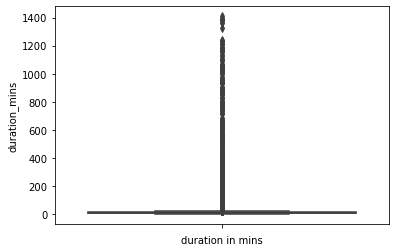

In [64]:
#lets check for outliers 
sb.boxplot(data = df, y = 'duration_mins');
plt.xlabel('duration in mins');


the plot isnt helping that much about telling exaclty when the outliers start to exist due to the huge numbers of outliers so lets zoom in to see where exacltly the outliers starting to disappear

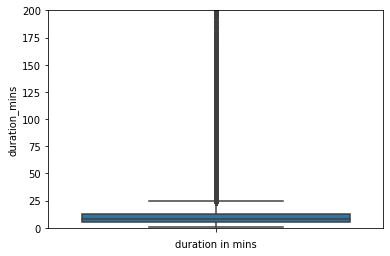

In [65]:
sb.boxplot(data = df, y = 'duration_mins');
plt.ylim(0, 200)
plt.xlabel('duration in mins');

again the plot isnt helping that much where the outliers exaclty start to appear so we need to see where do 99% of our data lies and see our trup duration distribution on a histogram

In [66]:
df['duration_mins'].describe(percentiles=[.99])

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
50%           8.500000
99%          52.933333
max        1409.133333
Name: duration_mins, dtype: float64

we can see that 99% of our data are between 1 to 53 mins lets see the distribution of our data for the trips that are under an hour (60 mins)

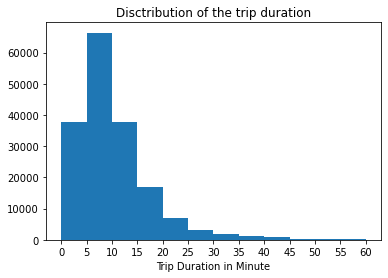

In [67]:
binsize=5
bins=np.arange(0,60+binsize,binsize)
plt.hist(data=df, x='duration_mins', bins=bins);
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50,55,60]);
plt.xlabel('Trip Duration in Minute');
plt.title('Disctribution of the trip duration');

as we can see most of the trip durations lies between 1 min to 24 mins. the distribution is right skewed. so we can saftly remove all the trips that are above 25 mins as we want our distribtion to as close as to be normal so our analysis would be more accurate

In [68]:
#removing all trips with durations that are more than 25(outliers)
df = df[df['duration_mins'] <=25]

Lets check for the age of our members

In [69]:
df.member_age.describe()

count    165785.000000
mean         36.167186
std          10.042222
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

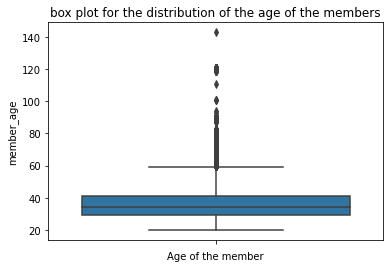

In [70]:
#we can see that the max age is 143 which is deff a big outlier but we need to investigate more
sb.boxplot(data = df, y = 'member_age');
plt.xlabel('Age of the member');
plt.title('box plot for the distribution of the age of the members');

we can see that the outliers for the age of our members is somehow start to appear from a value between 60 and 80 ,now lets check were do 99% of our data fits

In [71]:
df['member_age'].describe(percentiles=[.99])

count    165785.000000
mean         36.167186
std          10.042222
min          20.000000
50%          34.000000
99%          66.000000
max         143.000000
Name: member_age, dtype: float64

99 percent of our data lies between 20 to 66 years old

In [72]:
#lets remove the outliers
df = df[df['member_age'] <= 66]

In [73]:
df.member_age.describe()

count    164217.000000
mean         35.803394
std           9.303173
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          66.000000
Name: member_age, dtype: float64

In [74]:
def boxplot(data,x,y,title):
    color=sb.color_palette()[0]
    figure= sb.boxplot(data=data, x=x, y=y, color=color);
    figure.set_xticklabels(figure.get_xticklabels(), rotation=40, ha="right");
    figure.set(title=title);

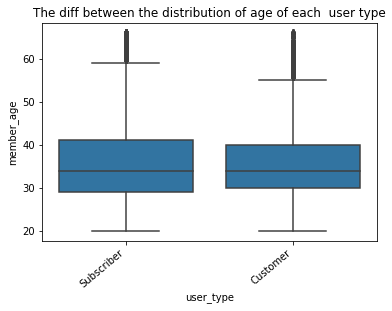

In [75]:
boxplot(df,'user_type','member_age','The diff between the distribution of age of each  user type');

Subscribers are older than Customers

Now lets see the ratio between the members who are subscirbed and customers

In [76]:
data=[df["user_type"].value_counts()[0],df["user_type"].value_counts()[1]]
labels = ['Subscriber', 'Customer']

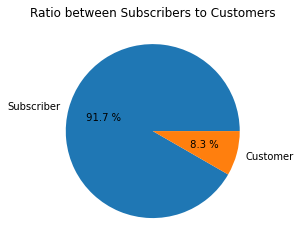

In [77]:
plt.pie(data,labels=labels,autopct ='% 1.1f %%')
plt.title('Ratio between Subscribers to Customers')
plt.show()

Most of the members are Subscribers with a 91.7% compared to 8.3% of Customers

So lets see how many male,female and other in the Subscribers Members

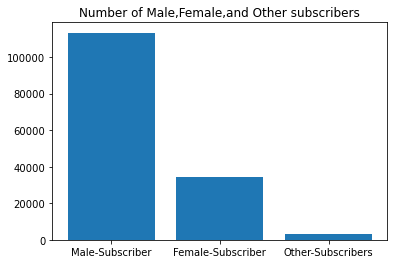

In [78]:
x=df[(df.member_gender == 'Male') & (df.user_type == 'Subscriber')].count()[0]
y=df[(df.member_gender == 'Female') & (df.user_type == 'Subscriber')].count()[0]
z=df[(df.member_gender == 'Other') & (df.user_type == 'Subscriber')].count()[0]
s=['Male-Subscriber','Female-Subscriber','Other-Subscribers']
d=[x,y,z]
plt.bar(s,d)
plt.title('Number of Male,Female,and Other subscribers');

we can see that most of our subscribers are males with more than 100000 compared to a 30000-35000 Female-Subscriber and less than 3000 Others-Subscirbers

Now lets check for the peek days and hours,start and end stations

In [95]:
# ordering the week days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df['rental_day'] = df['rental_day'].astype(ordered_days)

In [96]:
df.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age,duration_mins,rental_day,rental_hour
6,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,38.0,19.116667,Thursday,23
9,Post St at Kearny St,Mission Playground,Subscriber,Male,No,29.0,17.483333,Thursday,23
10,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,Female,Yes,25.0,7.633333,Thursday,23
11,Civic Center/UN Plaza BART Station (Market St ...,Bryant St at 2nd St,Subscriber,Male,No,28.0,8.433333,Thursday,23
12,Valencia St at 21st St,Broadway at Kearny,Customer,Male,No,31.0,19.600000,Thursday,23


In [97]:
def countplot(x,title):
    color=sb.color_palette()[0]
    figure=sb.countplot(data = df, x = x,color=color);
    figure.set_xticklabels(figure.get_xticklabels(), rotation=40, ha="right");
    figure.set(title=title);


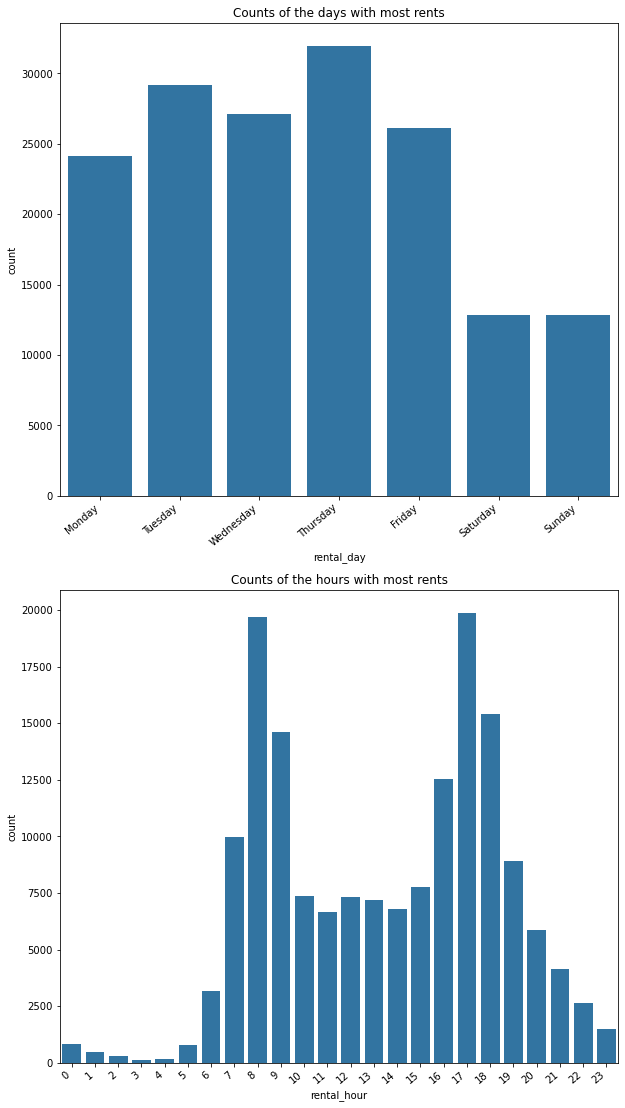

In [98]:
plt.figure(figsize = [10, 40]);
plt.subplot(4, 1, 1);
countplot('rental_day','Counts of the days with most rents');
plt.subplot(4, 1, 2);
countplot('rental_hour','Counts of the hours with most rents');



as we can see Thursday and Tuesday are the most 2 days with rents

The almost two equaly peek hours are either 8 am in the morning or 5 pm

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As a summary,There are more Subscribers than Customers in general in our data set and most of these Subscribers are males.
most of the trip durations lies between 1 to 24 mins. most of the members age is between 20 to 66 and there were some outliers after these 66.
No need for any transformation to be performed

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The distribution of age wasn't very clear so there was a zoom in required to see where does the outliers start to appear.And as for the duration in mins the data was right skewed so the outliers had to be removied in order to normalize its distribtion for more accurate analysis

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [81]:
df.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age,duration_mins,rental_day,rental_hour
6,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,38.0,19.116667,Thursday,23
9,Post St at Kearny St,Mission Playground,Subscriber,Male,No,29.0,17.483333,Thursday,23
10,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,Female,Yes,25.0,7.633333,Thursday,23
11,Civic Center/UN Plaza BART Station (Market St ...,Bryant St at 2nd St,Subscriber,Male,No,28.0,8.433333,Thursday,23
12,Valencia St at 21st St,Broadway at Kearny,Customer,Male,No,31.0,19.600000,Thursday,23


Lets see the relationship between the member's age and the duration  in mins of their trips

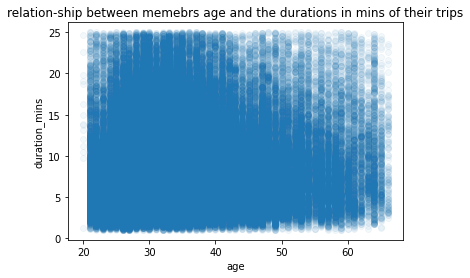

In [82]:
plt.scatter(x=df.member_age,y=df.duration_mins, alpha=1/20)
plt.xlabel('age');
plt.ylabel('duration_mins');
plt.title('relation-ship between memebrs age and the durations in mins of their trips');

even though adjusting our alpha, our data set is very big that most of the points still overlap.
but we can still observe that almost all the ages between 20 til 66  can have trip durtaions between 2 to 25 mins,
howvever people who age between 25-35 have more trips of duration 15-25 mins  than the other ages

Now lets check the relation between the rental days and the duration of the trips , also the rental hours and the duration of the trips

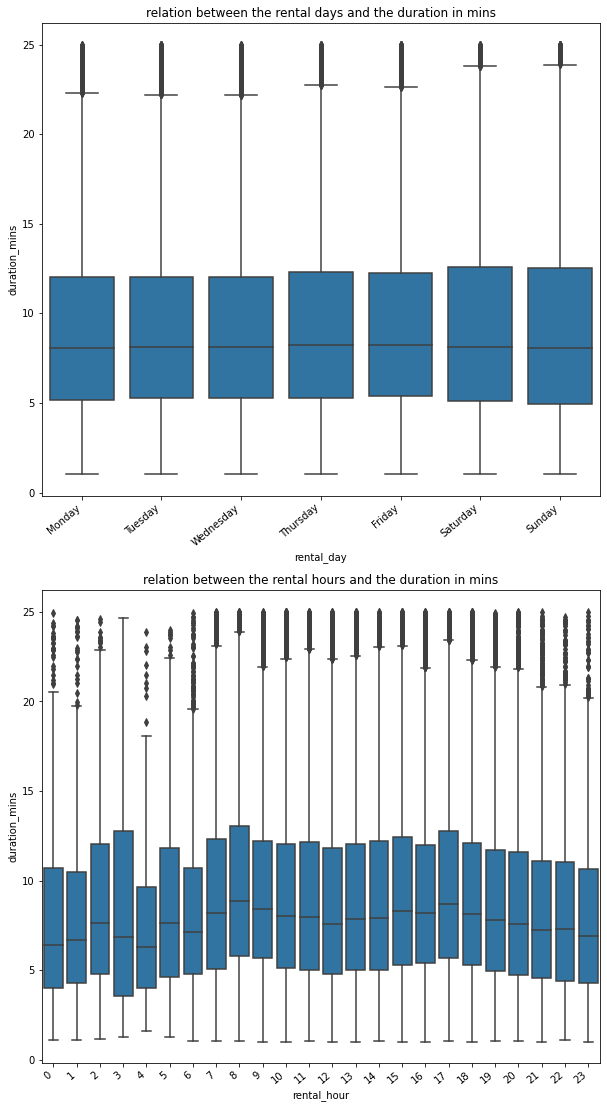

In [99]:
plt.figure(figsize = [10, 40]);


plt.subplot(4, 1, 1);
boxplot(df,'rental_day','duration_mins','relation between the rental days and the duration in mins');
plt.subplot(4, 1, 2);
boxplot(df,'rental_hour','duration_mins','relation between the rental hours and the duration in mins');

as we can see Sunday and Saturday are the most 2 days with with trips durations(maybe because they are weekends)

and 5 pm ,8 am , and 3 am are the most 3 hours with trip durations

Now lets see the weekly,and per hour usage for the members(Subscribers vs Customers)

In [84]:
df.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age,duration_mins,rental_day,rental_hour
6,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,38.0,19.116667,Thursday,23
9,Post St at Kearny St,Mission Playground,Subscriber,Male,No,29.0,17.483333,Thursday,23
10,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,Female,Yes,25.0,7.633333,Thursday,23
11,Civic Center/UN Plaza BART Station (Market St ...,Bryant St at 2nd St,Subscriber,Male,No,28.0,8.433333,Thursday,23
12,Valencia St at 21st St,Broadway at Kearny,Customer,Male,No,31.0,19.600000,Thursday,23


In [85]:
def countplot1(x,hue,title,xlabel,ylabel):
    sb.countplot(data=df, x=x, hue=hue);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

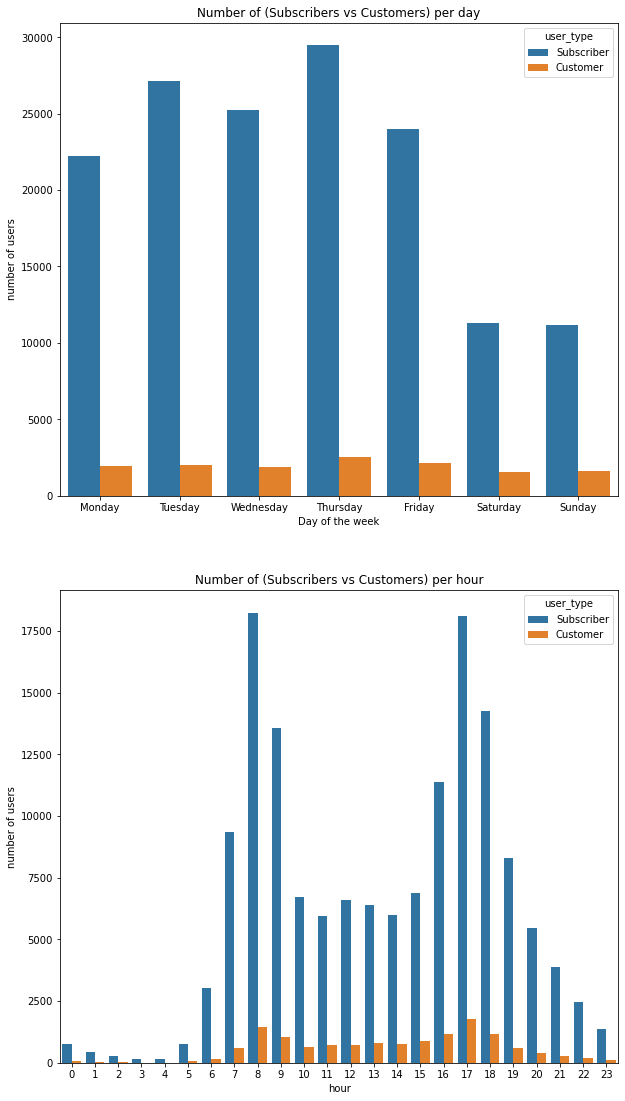

In [100]:
plt.figure(figsize = [10, 40]);
plt.subplot(4, 1, 1);
countplot1('rental_day','user_type','Number of (Subscribers vs Customers) per day','Day of the week','number of users')
plt.subplot(4, 1, 2);
countplot1('rental_hour','user_type','Number of (Subscribers vs Customers) per hour','hour','number of users')



as seen in the previous 2 graphs
Sunday and Saturday are the least 2 days in terms of bike usage weather it was for a Subscriber or a Customer (maybe because they are weekends)

8 am and 5 pm are two peek hours 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Subscribers tend to use their bikes more on workdays than on weekends as we can observe that Sundays and Saturdays are the least 2 days for Subs in terms of usage of their bikes.
the highest trip durations are at 5 pm 8 and 3 am. However the highest trip durations occure on weekend(Sat and Sun) which maybe happens because people tend to have more fun and enjoy their times on the weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
In the relationship between member ages and the duration of thier trips lmost all the ages between 20 til 66 can have trip durtaions between 2 to 25 mins, howvever people who age between 25-35 have more trips of duration 15-25 mins than the other ages


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Lets see the relationship between Subscribers and Customers interms of the age vs duration per mins of their trips

In [158]:
#we will take a 500 sample of our data set
#250 of them are Subs and 250 are Customers

s0 = df.user_type[df.user_type.eq('Customer')].sample(250).index
s1 = df.user_type[df.user_type.eq('Subscriber')].sample(250).index 

df_sample = df.loc[s0.union(s1)]

C:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


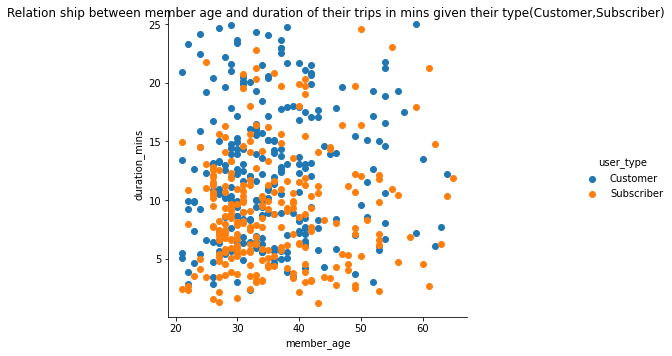

In [159]:
g = sb.FacetGrid(data = df_sample, hue = 'user_type', size = 5)
g.map(plt.scatter, 'member_age', 'duration_mins')
g.add_legend()
g.fig.suptitle('Relation ship between member age and duration of their trips in mins given their type(Customer,Subscriber)');

we can notice that in general  Customers tend to have the higher trip duration of their trips at any given age compared to Subs.
And subscribers tend to be older than Customers.However these results arent 100% accurate as these are just random samples from our data. 


lets see  how the trip duration during the weekdays and the hours of the day varies between a customer and a subscirber

In [160]:
def pointplot1(x,y,hue,xlabel,ylabel,title):
    figure=sb.pointplot(data=df, x=x, y=y, hue=hue);
    figure.set_xticklabels(figure.get_xticklabels(), rotation=40, ha="right");
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

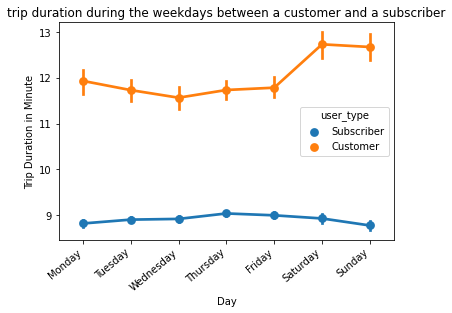

In [161]:
pointplot1('rental_day','duration_mins','user_type','Day','Trip Duration in Minute','trip duration during the weekdays between a customer and a subscriber')

we can observe that on avg, Subscribers in general tend to have less trip duration  than Customers


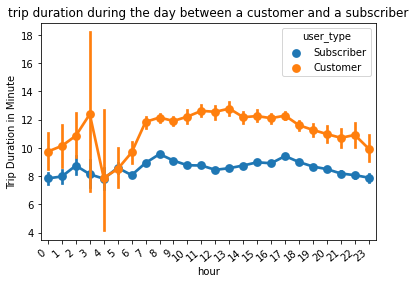

In [91]:
pointplot1('rental_hour','duration_mins','user_type','hour','Trip Duration in Minute','trip duration during the day between a customer and a subscriber')

we can observe that on avg, Customers in general tend to more trip durations during most hours of the day than Susbribers
excpet at 5 and 6  they are almost the same

we can also observe a more variation in the trip durations of the Customers than the Subscribers


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Most of these features are independent so there were no featres that  strengethened each other that much,However the multivariate exploration helped in explaining and having a clearer vision of the univariate exploration.
For instace in the univariate we saw that mostly subs tend to  have more bike rides and trips than customers 
However in the multivariant we saw that customers avg duration of their trips is more than the subscribers

### Were there any interesting or surprising interactions between features?

during the hours of the day customers and subscribers tend to have the same avg trip time at 5 and 6 pm
also customers tend to have more spread in their trip durations than Subscirbers.
 
we have also noticed that in general Customers tend to have the higher trip duration of their trips at any given age compared to Subs. And subscribers tend to be older than Customers.However these results arent 100% accurate as these are just random samples from our data.

In [162]:
df.to_csv('adjusted_data-set.csv')


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!